In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('titanic2.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
data.drop(['Name', 'Fare', 'Cabin', 'Ticket'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


In [71]:
print(data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         0
dtype: int64


In [72]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64


In [73]:
xx = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Embarked']]
y = data['Survived']

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(xx)
x[0]

array([-1.73010796,  0.82737724,  0.73769513, -0.5924806 ,  0.43279337,
       -0.47367361,  0.58111394])

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []
for k in range(1,11):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(x_train,y_train)
  preds = model.predict(x_test)
  acc.append(accuracy_score(y_test,preds))
acc

[0.7039106145251397,
 0.7430167597765364,
 0.770949720670391,
 0.7653631284916201,
 0.7932960893854749,
 0.776536312849162,
 0.7821229050279329,
 0.7877094972067039,
 0.7877094972067039,
 0.7821229050279329]

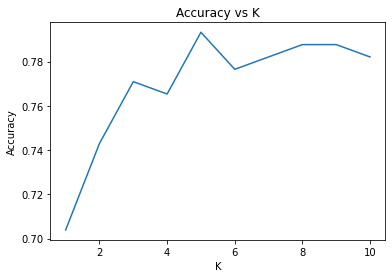

In [77]:
plt.plot([i for i in range(1,11)],acc)  
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()

In [78]:
acc = np.array(acc)
np.argmax(acc)

4

In [79]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds,labels=[1,0])
print(cm)

[[ 40  29]
 [  9 101]]


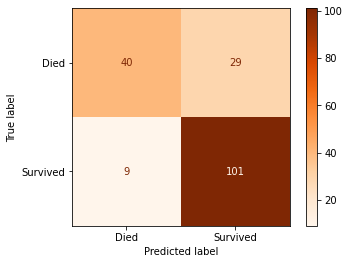

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
display.plot(cmap="Oranges")

Area under the curve:  0.7489459815546772


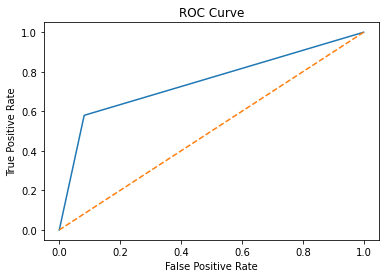

In [82]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, preds)
area = auc(fpr, tpr)
print("Area under the curve: ", area)
plt.plot(fpr, tpr)
plt.plot([1, 0], [1, 0], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
